In [92]:
import numpy as np
import pandas as pd

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [94]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


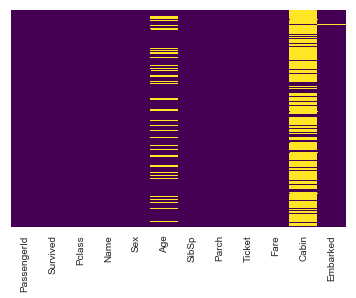

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
sns.set_style('whitegrid')

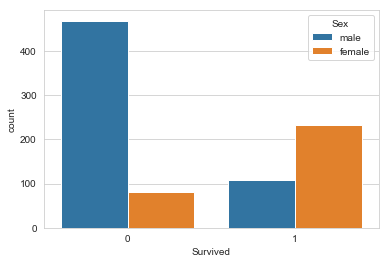

In [101]:
sns.countplot(x='Survived',hue='Sex',data=train)

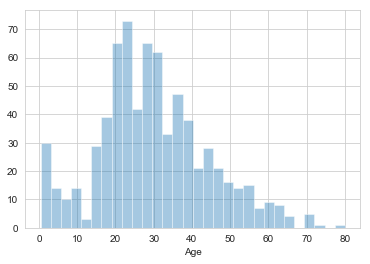

In [58]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


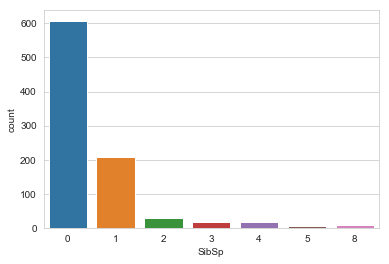

In [60]:
sns.countplot(x='SibSp',data=train)

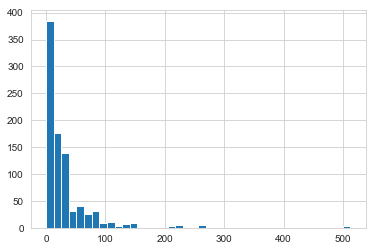

In [61]:
train['Fare'].hist(bins=40)

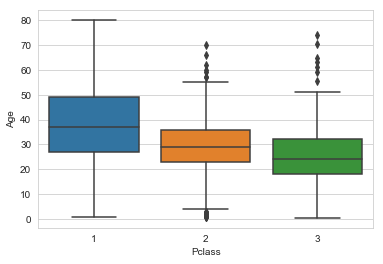

In [62]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [63]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [64]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

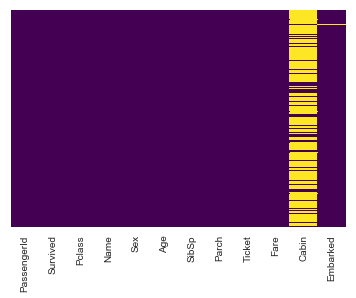

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
train.drop('Cabin',axis=1,inplace=True) ##this column has to many missing values so decided to drop it rather then fill values for missing rows
test.drop('Cabin',axis=1,inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


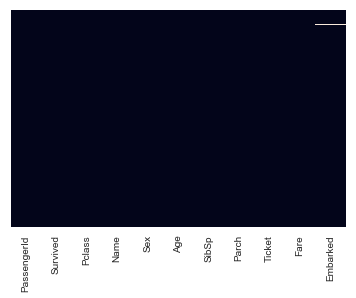

In [68]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [69]:
train.dropna(inplace=True) #drop rows with null values in any column
test.dropna(inplace=True)

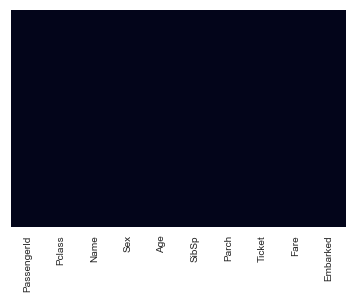

In [70]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [71]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)

In [72]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [73]:
train = pd.concat([train,sex,embark],axis =1)
test = pd.concat([test,sex_test,embark_test],axis=1)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [75]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) ##These columns are not usefull
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [76]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [77]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [78]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.30,random_state=25)

In [80]:
# X_test = test.drop('Survived',axis=1)
# Y_test = test['Survived']

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_model = LogisticRegression()

In [83]:
log_model.fit(X_train,Y_train)

G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
predictions = log_model.predict(X_test)
acc = log_model.score(X_test,Y_test)

In [85]:
acc

0.7715355805243446

In [87]:
confusion_matrix(Y_test,predictions)

array([[137,  27],
       [ 34,  69]], dtype=int64)